# ATMOSPHERIC SCIENCE FIELD WORK

# MET 359

# NAME: BINEY MICHAEL


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
uruguay=xr.open_mfdataset('/home/biney/fieldwork/uruguay/*.nc')
uruguay

<xarray.Dataset>
Dimensions:   (lon: 23, lat: 21, datetime: 6939)
Coordinates:
  * lon       (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat       (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2019-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 21, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [3]:
uruguay_1 = uruguay.sel(datetime=slice("2006","2015"),lon=(-57.75),lat=(-33.25))
uruguay_1

<xarray.Dataset>
Dimensions:   (datetime: 3652)
Coordinates:
    lon       float32 -57.75
    lat       float32 -33.25
  * datetime  (datetime) datetime64[ns] 2006-01-01 2006-01-02 ... 2015-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime) float32 dask.array<chunksize=(365,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [4]:
uruguay1_precip = uruguay_1['precip']
uruguay1_precip

<xarray.DataArray 'precip' (datetime: 3652)>
dask.array<getitem, shape=(3652,), dtype=float32, chunksize=(366,), chunktype=numpy.ndarray>
Coordinates:
    lon       float32 -57.75
    lat       float32 -33.25
  * datetime  (datetime) datetime64[ns] 2006-01-01 2006-01-02 ... 2015-12-31
Attributes:
    grid_mapping:  crs

In [5]:
monthly_rainfall = uruguay1_precip.resample(datetime='1M').sum('datetime')
monthly_rainfall

,Array,Chunk
Bytes,480 B,4 B
Shape,"(120,)","(1,)"
Count,787 Tasks,120 Chunks
Type,float32,numpy.ndarray


In [6]:
monthly_climatology = monthly_rainfall.groupby('datetime.month').mean()
monthly_climatology

<xarray.DataArray 'precip' (month: 12)>
dask.array<stack, shape=(12,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -57.75
    lat      float32 -33.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [7]:
annual_total = uruguay1_precip.resample(datetime='1Y').sum()
annual_total

<xarray.DataArray 'precip' (datetime: 10)>
dask.array<stack, shape=(10,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * datetime  (datetime) datetime64[ns] 2006-12-31 2007-12-31 ... 2015-12-31
    lon       float32 -57.75
    lat       float32 -33.25

In [8]:
annual_average = annual_total.groupby('datetime.month').mean()
annual_average

<xarray.DataArray 'precip' (month: 1)>
dask.array<stack, shape=(1,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lon      float32 -57.75
    lat      float32 -33.25
  * month    (month) int64 12

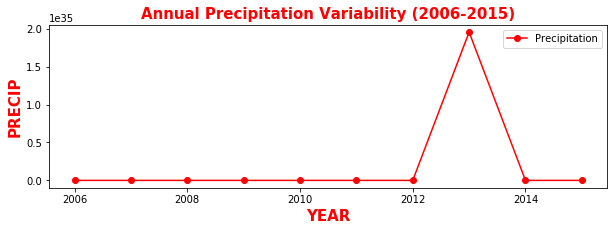

In [10]:
#Time series on the year to year trends and changes.
annual_total = uruguay1_precip.groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
annual_total.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='Precipitation')
ax.set_title('Annual Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

In [11]:
urug= xr.open_mfdataset('/home/biney/fieldwork/uruguay/*.nc')
urug

<xarray.Dataset>
Dimensions:   (lon: 23, lat: 21, datetime: 6939)
Coordinates:
  * lon       (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat       (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2019-12-31
Data variables:
    crs       (datetime) int32 -2147483647 -2147483647 ... -2147483647
    precip    (datetime, lat, lon) float32 dask.array<chunksize=(365, 21, 23), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6

In [12]:
urug_precip1 = urug['precip']
urug_precip1

<xarray.DataArray 'precip' (datetime: 6939, lat: 21, lon: 23)>
dask.array<concatenate, shape=(6939, 21, 23), dtype=float32, chunksize=(366, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon       (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat       (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * datetime  (datetime) datetime64[ns] 2001-01-01 2001-01-02 ... 2019-12-31
Attributes:
    grid_mapping:  crs

In [13]:
urug1 = urug_precip1
annual_dry_days = (urug1< 1).groupby('datetime.year').sum(dim='datetime')
annual_dry_days

<xarray.DataArray 'precip' (year: 19, lat: 21, lon: 23)>
dask.array<stack, shape=(19, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2015 2016 2017 2018 2019

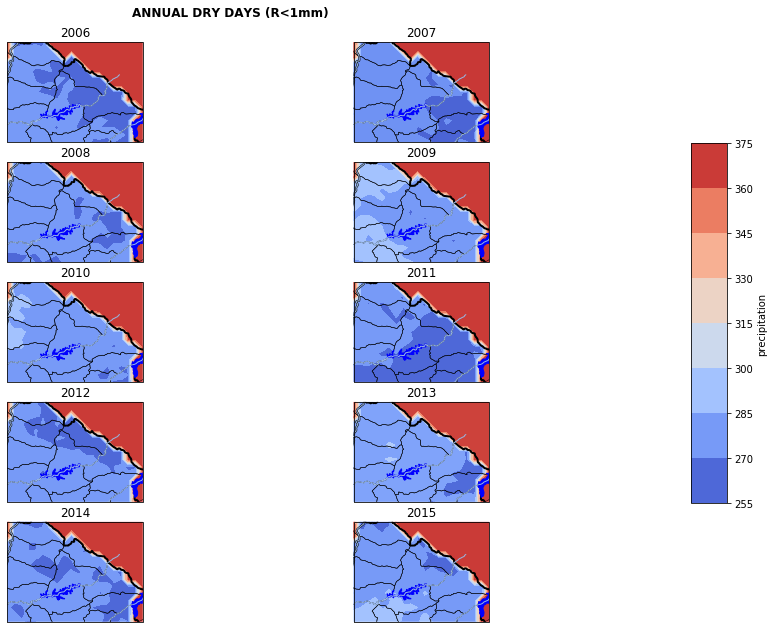

In [14]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(annual_dry_days.lon, annual_dry_days.lat, annual_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL DRY DAYS (R<1mm)', fontweight='bold');
#plt.savefig('done.png');

In [15]:
urug2= urug_precip1
annual_wet_days = (urug2 >= 1).groupby('datetime.year').sum(dim='datetime')
annual_wet_days

<xarray.DataArray 'precip' (year: 19, lat: 21, lon: 23)>
dask.array<stack, shape=(19, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2015 2016 2017 2018 2019

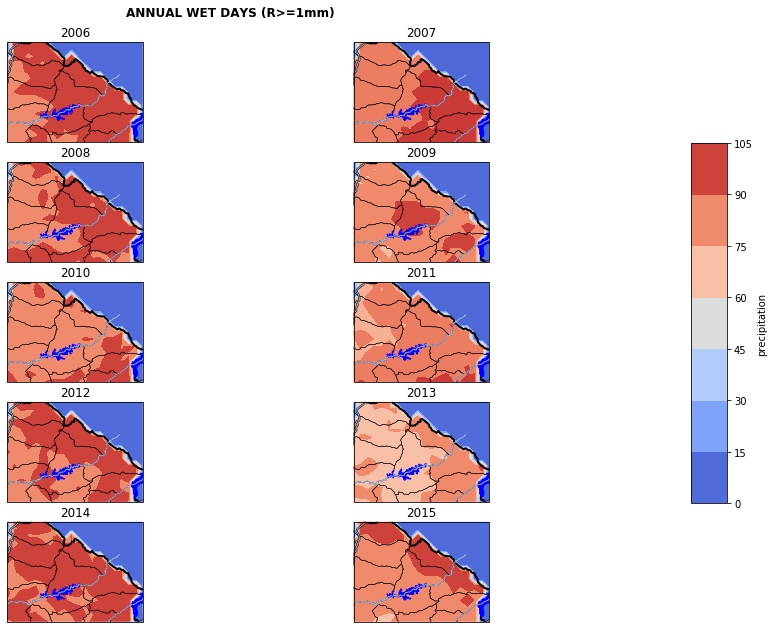

In [16]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
year_names=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(year_names[i])
    cb= ax[i].contourf(annual_wet_days.lon, annual_wet_days.lat, annual_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('ANNUAL WET DAYS (R>=1mm)', fontweight='bold');
#plt.savefig('done.png');

In [17]:
urug=urug_precip1
monthly_dry_days = (urug< 1).groupby('datetime.month').sum(dim='datetime')
monthly_dry_days

<xarray.DataArray 'precip' (month: 12, lat: 21, lon: 23)>
dask.array<stack, shape=(12, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

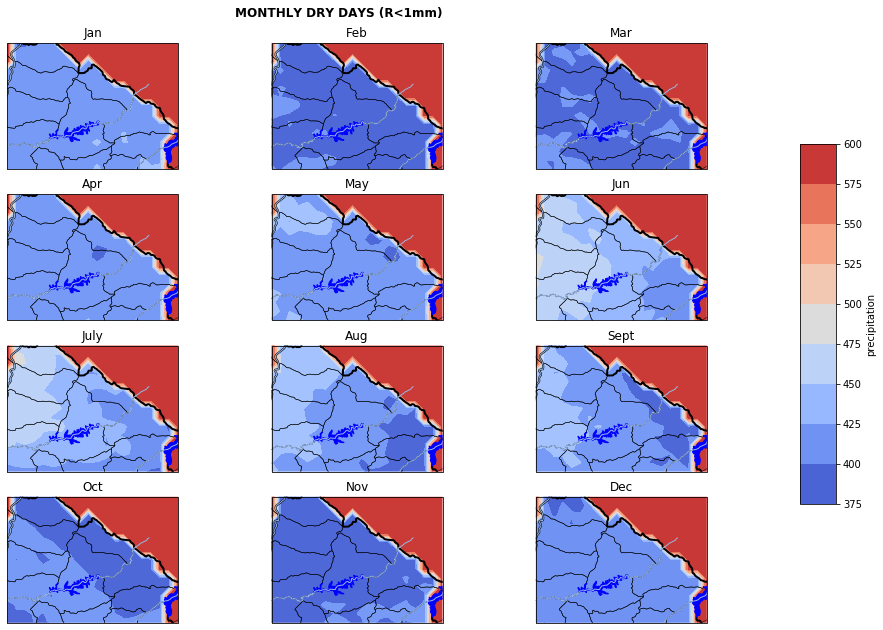

In [18]:
 #SPATIAL PLOTS FOR MONTHLY DRY  DAYS
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_dry_days.lon, monthly_dry_days.lat, monthly_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY DRY DAYS (R<1mm)', fontweight='bold');
#plt.savefig('done.png');

In [19]:
urug= urug_precip1
monthly_wet_days = (urug >= 1).groupby('datetime.month').sum(dim='datetime')
monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 21, lon: 23)>
dask.array<stack, shape=(12, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

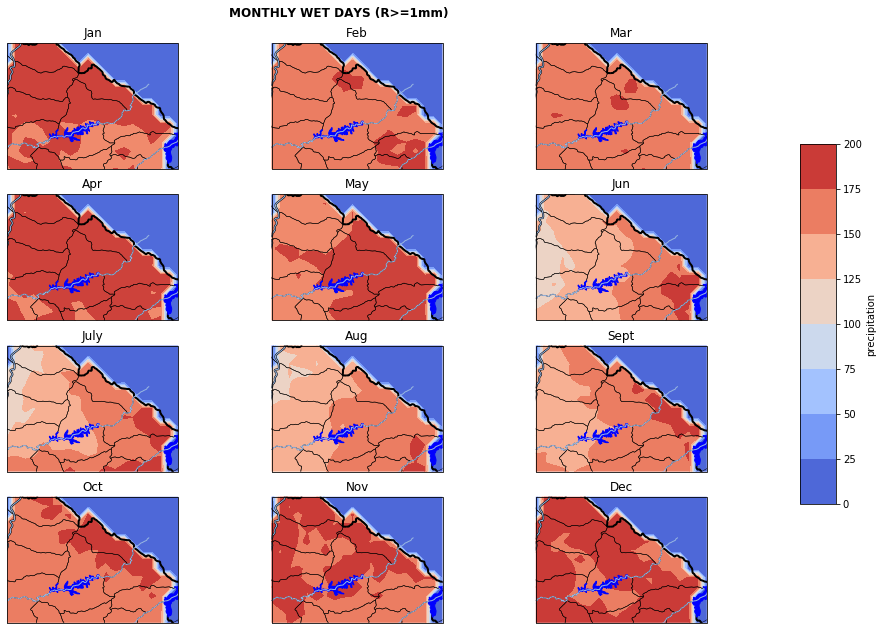

In [20]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(monthly_wet_days.lon, monthly_wet_days.lat, monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('MONTHLY WET DAYS (R>=1mm)', fontweight='bold');
#plt.savefig('done.png');

# TIMESERIES

In [27]:
#NUMBER OF DRY DAYS(RR<1mm) AND WET DAYS (RR>=1mm) PER MONTH
dry_days_monthly = (uruguay_1['precip']< 1).resample(datetime='1M').sum()
wet_days_monthly = (uruguay_1['precip']>=1).resample(datetime='1M').sum()

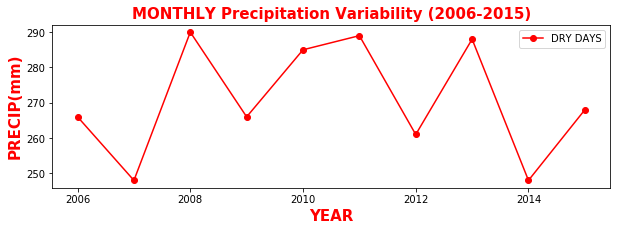

In [28]:
   #TIMESERIES FOR DRY DAYS(RR<1mm) PER MONTH
dry_days_monthly = (uruguay_1['precip']< 1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('MONTHLY Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

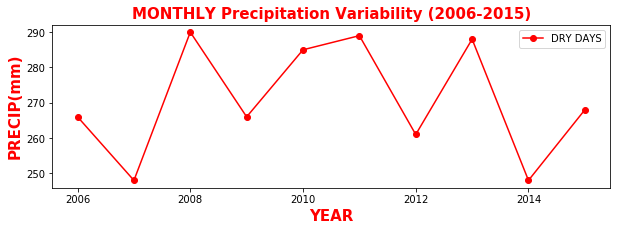

In [29]:
#TIMESERIES FOR WET DAYS(RR>1mm) PER MONTH
wet_days_monthly = (uruguay_1['precip']< 1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_monthly.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('MONTHLY Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

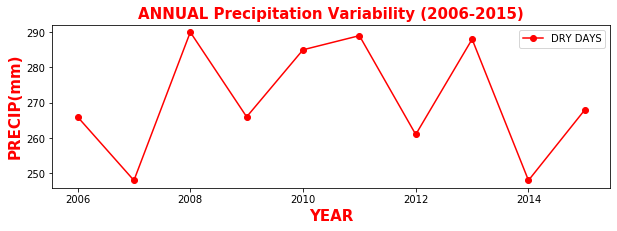

In [20]:
#TIMESERIES FOR DRY DAYS(RR<1mm) PER YEAR
dry_days_annual = (uruguay_1['precip']< 1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
dry_days_annual.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='DRY DAYS')
ax.set_title('ANNUAL Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

In [25]:
#TIME SERIES FOR WET DAYS RR>1MM PER YEAR

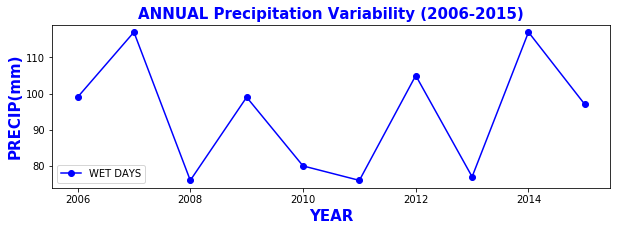

In [21]:
wet_days_annual = (uruguay_1['precip']>=1).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
wet_days_annual.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('ANNUAL Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [30]:
extremme_10mm = urug_precip1
extremme_10mm_annual_wet_days = (extremme_10mm > 10).groupby('datetime.year').sum(dim='datetime')
extremme_10mm_annual_wet_days

<xarray.DataArray 'precip' (year: 19, lat: 21, lon: 23)>
dask.array<stack, shape=(19, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2015 2016 2017 2018 2019

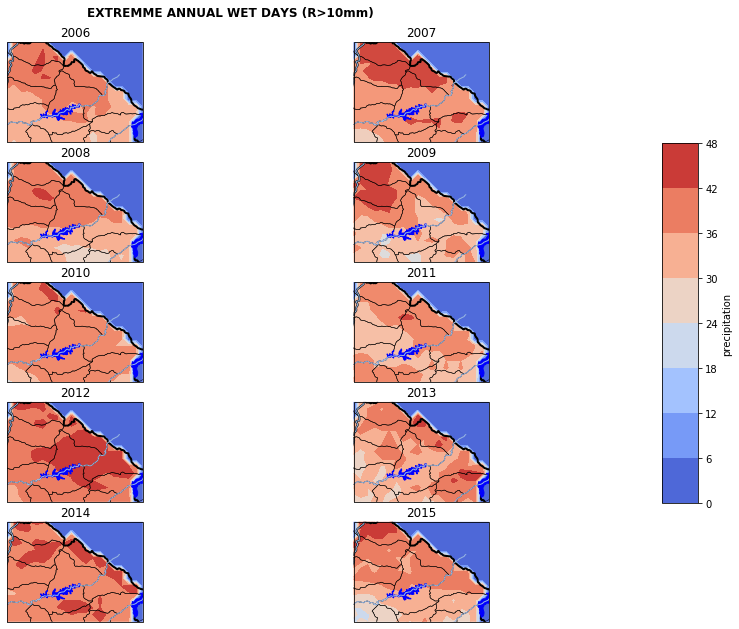

In [31]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_10mm_annual_dry_days.lon, extremme_10mm_annual_dry_days.lat, extremme_10mm_annual_dry_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.80,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREMME ANNUAL WET DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [29]:
extremme_20mm = urug_precip1
extremme_20mm_annual_wet_days = (extremme_20mm > 20).groupby('datetime.year').sum(dim='datetime')
extremme_20mm_annual_wet_days

<xarray.DataArray 'precip' (year: 19, lat: 21, lon: 23)>
dask.array<stack, shape=(19, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * year     (year) int64 2001 2002 2003 2004 2005 ... 2015 2016 2017 2018 2019

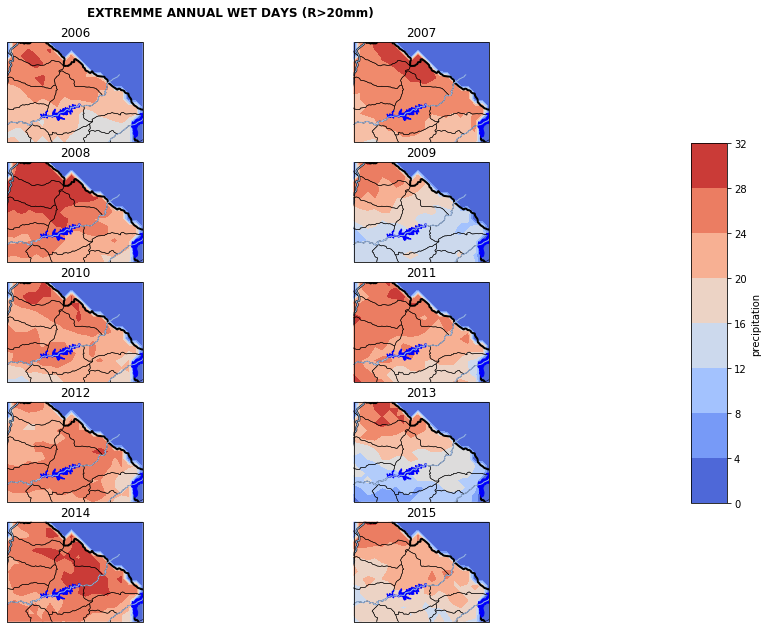

In [30]:
fig,ax=plt.subplots(5,2,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
for i in range(10):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_20mm_annual_wet_days.lon, extremme_20mm_annual_wet_days.lat, extremme_20mm_annual_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle('EXTREMME ANNUAL WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [32]:
extremme_10mm_urug = urug_precip1
extremme_10mm_monthly_wet_days = (extremme_10mm_urug > 10).groupby('datetime.month').sum(dim='datetime')
extremme_10mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 21, lon: 23)>
dask.array<stack, shape=(12, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

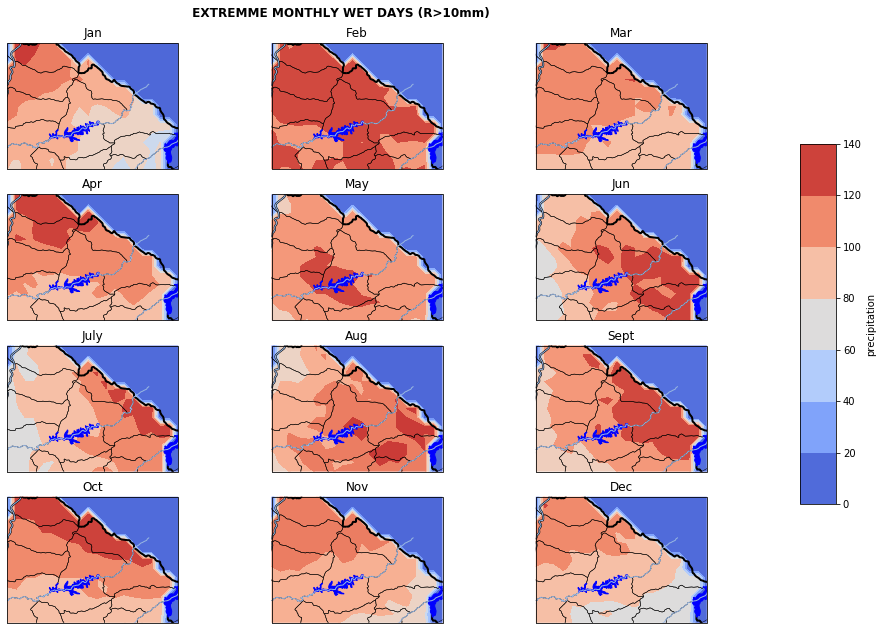

In [34]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_10mm_monthly_wet_days.lon, extremme_10mm_monthly_wet_days.lat, extremme_10mm_monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREMME MONTHLY WET DAYS (R>10mm)', fontweight='bold');
#plt.savefig('done.png');

In [33]:
extremme_20mm_urug = urug_precip1
extremme_20mm_monthly_wet_days = (extremme_20mm_urug > 20).groupby('datetime.month').sum(dim='datetime')
extremme_20mm_monthly_wet_days

<xarray.DataArray 'precip' (month: 12, lat: 21, lon: 23)>
dask.array<stack, shape=(12, 21, 23), dtype=int64, chunksize=(1, 21, 23), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -58.5 -58.25 -58.0 -57.75 ... -53.5 -53.25 -53.0
  * lat      (lat) float32 -29.75 -30.0 -30.25 -30.5 ... -34.25 -34.5 -34.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

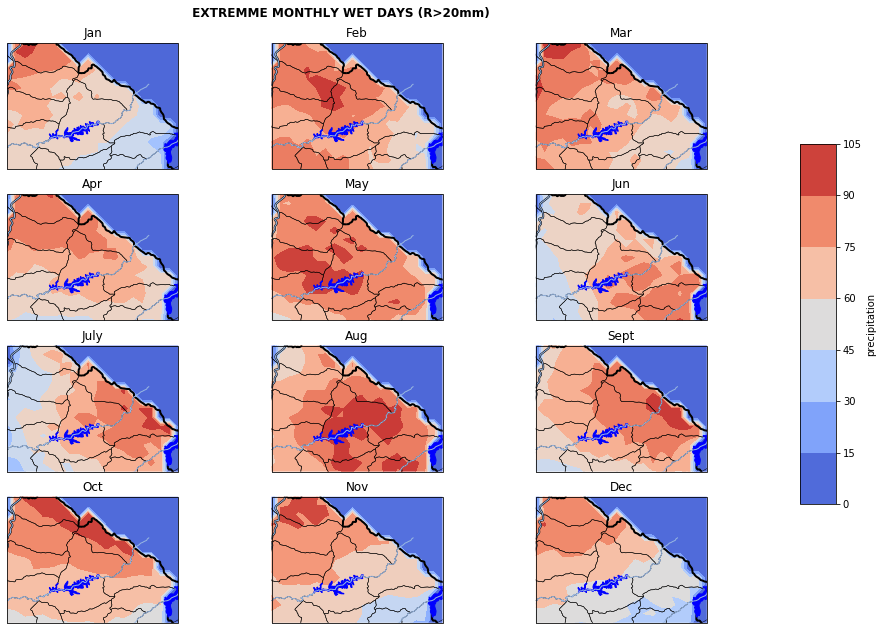

In [35]:
fig,ax=plt.subplots(4,3,figsize=(20,10), 
                    subplot_kw={'projection': ccrs.PlateCarree()})
ax=ax.flatten()
month_names=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept','Oct','Nov','Dec']
for i in range(12):
    #ax[i].add_feature(cfeature.COASTLINE.with_scale('110m'),linewidth=0.5)
    ax[i].add_feature(cfeature.BORDERS,linewidth=2)
    ax[i].add_feature(cfeature.STATES, linewidth=0.5)
    #ax[i].add_feature(cfeature.OCEAN)
    ax[i].add_feature(cfeature.LAKES, color='blue')
    ax[i].add_feature(cfeature.RIVERS)
    ax[i].set_extent([-58.00,-53.25,-30.25,-33.75])
    ax[i].set_title(month_names[i])
    cb= ax[i].contourf(extremme_20mm_monthly_wet_days.lon, extremme_20mm_monthly_wet_days.lat, extremme_20mm_monthly_wet_days[i],
                       cmap='coolwarm', transform=ccrs.PlateCarree())
    color_bar=fig.add_axes([0.82,0.29,0.025,0.5])
fig.colorbar(cb,cax=color_bar,label='precipitation')
fig.subplots_adjust(wspace=-0.55, top=0.93)
plt.suptitle(' EXTREMME MONTHLY WET DAYS (R>20mm)', fontweight='bold');
#plt.savefig('done.png');

In [44]:
#NUMBER OF EXTREME DRY DAYS(RR>10mm) AND WET DAYS (RR>20mm) PER YEAR
extremme10mm_annual_wet_days = (uruguay_1['precip']> 10).resample(datetime='1Y').sum()
extremme20mm_annual_wet_days=(uruguay_1['precip']>20).resample(datetime='1Y').sum()

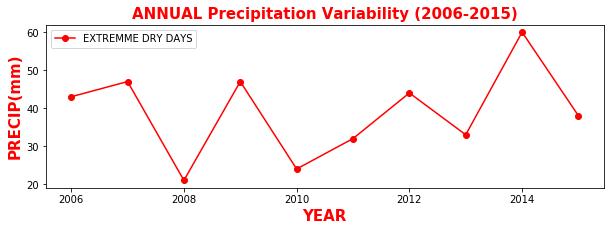

In [45]:
     #TIMESERIES FOR EXTREMME DRY DAYS(RR>10mm) PER YEAR
extremme10mm_annual_wet_days = (uruguay_1['precip']> 10).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extremme10mm_annual_wet_days.plot(color = 'red', lw = 1.5, marker = 'o', markersize = '6',label='EXTREMME DRY DAYS')
ax.set_title('ANNUAL Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

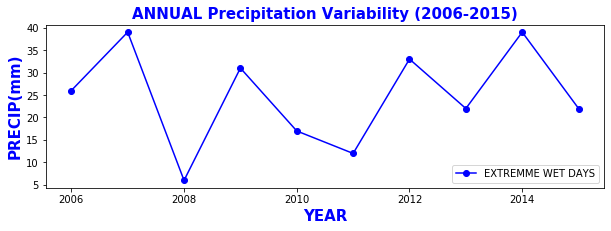

In [46]:
  #TIMESERIES FOR EXTREMME WET DAYS(RR>20mm) PER YEAR
extremme20mm_annual_wet_days = (uruguay_1['precip']> 20).groupby('datetime.year').sum()
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extremme20mm_annual_wet_days.plot(color = 'blue', lw = 1.5, marker = 'o', markersize = '6',label='EXTREMME WET DAYS')
ax.set_title('ANNUAL Precipitation Variability (2006-2015)',fontweight = 'bold', fontsize = 15,color='blue')
ax.set_xlabel('YEAR', fontweight = 'bold', fontsize = 15,color = 'blue')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'blue')
plt.legend()
plt.show()

In [47]:
extremme10mm_month_wet_days = (uruguay_1['precip']> 10).resample(datetime='1M').sum()
extremme20mm_month_wet_days=(uruguay_1['precip']>20).resample(datetime='1M').sum()

In [49]:
extremme10mm_month_wet_days= extremme10mm_month_wet_days.groupby('datetime.month').sum(dim='datetime')
extremme20mm_month_wet_days= extremme20mm_month_wet_days.groupby('datetime.month').sum(dim='datetime')

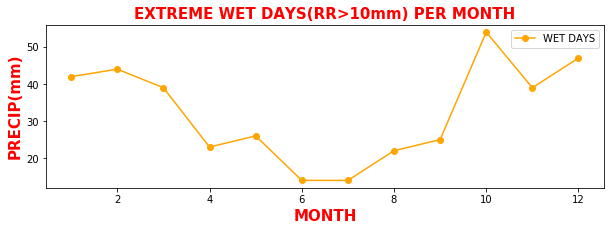

In [50]:
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extremme10mm_month_wet_days.plot(color = 'orange', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('EXTREME WET DAYS(RR>10mm) PER MONTH',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()

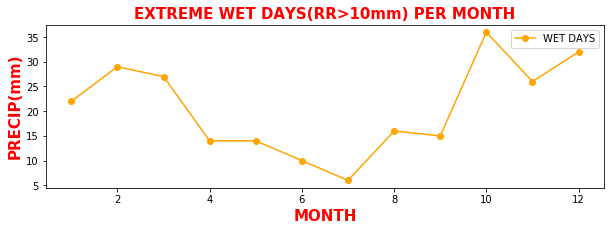

In [51]:
fig, ax = plt.subplots(figsize = (10,3))
plt.subplots_adjust(hspace = 0.5, wspace = 0.2)
extremme20mm_month_wet_days.plot(color = 'orange', lw = 1.5, marker = 'o', markersize = '6',label='WET DAYS')
ax.set_title('EXTREME WET DAYS(RR>10mm) PER MONTH',fontweight = 'bold', fontsize = 15,color='red')
ax.set_xlabel('MONTH', fontweight = 'bold', fontsize = 15,color = 'red')
ax.set_ylabel('PRECIP(mm)', fontweight = 'bold', fontsize = 15,color = 'red')
plt.legend()
plt.show()